# Getting deeper with Keras
* Tensorflow is a powerful and flexible tool, but coding large neural architectures with it is tedious.
* There are plenty of deep learning toolkits that work on top of it like Slim, TFLearn, Sonnet, Keras.
* Choice is matter of taste and particular task
* We'll be using Keras

In [66]:
import sys
sys.path.append("..")
import grading

In [67]:
# use preloaded keras datasets and models
! mkdir -p ~/.keras/datasets
! mkdir -p ~/.keras/models
! ln -s $(realpath ../readonly/keras/datasets/*) ~/.keras/datasets/
! ln -s $(realpath ../readonly/keras/models/*) ~/.keras/models/

/bin/sh: realpath: command not found
ln: ./datasets: File exists
/bin/sh: realpath: command not found
ln: ./models: File exists


In [68]:
import numpy as np
from preprocessed_mnist import load_dataset
import keras
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

In [89]:
X_train = X_train[:,:,:,np.newaxis]
X_val = X_val[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

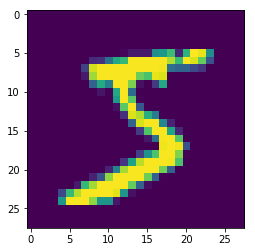

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]);

## The pretty keras

In [70]:
import tensorflow as tf
s = tf.InteractiveSession()

In [1]:
import keras
from keras.models import Sequential
import keras.layers as ll
from keras import regularizers

model = Sequential(name="mlp")

model.add(ll.InputLayer([28, 28, 1]))

# network body
#28*28
model.add(ll.Conv2D(32, 3, strides=(1,1), padding='same', data_format='channels_last', 
                activation='relu', kernel_regularizer=regularizers.l2(0.003)))
model.add(ll.Dropout(0.2))

model.add(ll.Conv2D(32, 3, strides=(1,1), padding='same', data_format='channels_last', 
                activation='relu', kernel_regularizer=regularizers.l2(0.003)))
model.add(ll.Dropout(0.2))

#14*14
model.add(ll.MaxPooling2D(pool_size=(2, 2)))
model.add(ll.Flatten())

model.add(ll.Dense(100, activation='relu'))
model.add(ll.Dropout(0.3))

model.add(ll.Dense(50, activation='tanh'))
model.add(ll.Dropout(0.3))

model.add(ll.Dense(50, activation='tanh'))
model.add(ll.Dropout(0.3))

# output layer: 10 neurons for each class with softmax
model.add(ll.Dense(10, activation='softmax'))

# categorical_crossentropy is your good old crossentropy
# but applied for one-hot-encoded vectors
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

Using TensorFlow backend.


TypeError: softmax() got an unexpected keyword argument 'axis'

In [92]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
__________

### Model interface

Keras models follow __Scikit-learn__'s interface of fit/predict with some notable extensions. Let's take a tour.

In [93]:
# fit(X,y) ships with a neat automatic logging.
#          Highly customizable under the hood.
model.fit(X_train, y_train,
          validation_data=(X_val, y_val), epochs=10);

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 222s 4ms/step - loss: 0.3415 - acc: 0.9137 - val_loss: 0.0936 - val_acc: 0.9826
Epoch 2/10
50000/50000 [==============================] - 218s 4ms/step - loss: 0.1351 - acc: 0.9698 - val_loss: 0.0790 - val_acc: 0.9843
Epoch 3/10
50000/50000 [==============================] - 220s 4ms/step - loss: 0.1101 - acc: 0.9754 - val_loss: 0.0714 - val_acc: 0.9870
Epoch 4/10
16704/50000 [=========>....................] - ETA: 2:20 - loss: 0.0914 - acc: 0.9804

KeyboardInterrupt: 

In [74]:
# estimate probabilities P(y|x)
model.predict_proba(X_val[:2])

array([[  4.85552683e-08,   2.32484483e-04,   5.48174066e-05,
          9.99543965e-01,   1.87835925e-09,   2.60632241e-05,
          4.92632546e-10,   3.82204826e-06,   1.36623785e-04,
          2.19500612e-06],
       [  2.09971877e-05,   4.68446757e-04,   1.28507512e-04,
          2.62828311e-03,   2.27875816e-07,   2.93724937e-04,
          2.56447493e-05,   4.23832398e-06,   9.96381640e-01,
          4.81700990e-05]], dtype=float32)

In [19]:
# Save trained weights
model.save("weights.h5")

ImportError: `save_model` requires h5py.

In [95]:
model.fit(X_train, y_train,
          validation_data=(X_val, y_val), epochs=5);

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
17728/50000 [=========>....................] - ETA: 2:28 - loss: 0.0980 - acc: 0.9783

KeyboardInterrupt: 

In [84]:
model.fit(X_train, y_train,
          validation_data=(X_val, y_val), epochs=5);

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 20s 392us/step - loss: 0.1920 - acc: 0.9754 - val_loss: 0.2089 - val_acc: 0.9712
Epoch 2/5
50000/50000 [==============================] - 19s 386us/step - loss: 0.1918 - acc: 0.9750 - val_loss: 0.2118 - val_acc: 0.9696
Epoch 3/5
50000/50000 [==============================] - 20s 407us/step - loss: 0.1911 - acc: 0.9752 - val_loss: 0.2411 - val_acc: 0.9602
Epoch 4/5
50000/50000 [==============================] - 19s 389us/step - loss: 0.1869 - acc: 0.9762 - val_loss: 0.1956 - val_acc: 0.9727
Epoch 5/5
50000/50000 [==============================] - 19s 374us/step - loss: 0.1880 - acc: 0.9754 - val_loss: 0.2570 - val_acc: 0.9561


In [96]:
print("\nLoss, Accuracy = ", model.evaluate(X_test, y_test))

10000/10000 [==============================] - 12s 1ms/step

Loss, Accuracy =  [0.061486352759599683, 0.98719999999999997]


### Whoops!
So far, our model is staggeringly inefficient. There is something wrong with it. Guess, what?

In [97]:
# Test score...
test_predictions = model.predict_proba(X_test).argmax(axis=-1)
test_answers = y_test.argmax(axis=-1)

test_accuracy = np.mean(test_predictions==test_answers)

print("\nTest accuracy: {} %".format(test_accuracy*100))

assert test_accuracy>=0.92,"Logistic regression can do better!"
assert test_accuracy>=0.975,"Your network can do better!"
print("Great job!")


Test accuracy: 98.72 %
Great job!


In [98]:
answer_submitter = grading.Grader("0ybD9ZxxEeea8A6GzH-6CA")
answer_submitter.set_answer("N56DR", test_accuracy)

In [99]:
answer_submitter.submit('sichenglei1125@gmail.com', '2ZuXdbHnGoAA0HwD')

SSLError: HTTPSConnectionPool(host='www.coursera.org', port=443): Max retries exceeded with url: /api/onDemandProgrammingScriptSubmissions.v1 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:645)'),))

## Keras + tensorboard

Remember the interactive graphs from Tensorboard one notebook ago? 

Thing is, Keras can use tensorboard to show you a lot of useful information about the learning progress. Just take a look!

In [ ]:
! rm -r /tmp/tboard/**

In [ ]:
from keras.callbacks import TensorBoard
model.fit(X_train, y_train, validation_data=(X_val, y_val), 
          epochs=10,
          callbacks=[TensorBoard("/tmp/tboard")])

# Tips & tricks

Here are some tips on what you could do. Don't worry, to reach the passing threshold you don't need to try all the ideas listed here, feel free to stop once you reach the 0.975 accuracy mark.

 * __Network size__
   * More neurons, 
   * More layers, ([docs](https://keras.io/))

   * Nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
     

 * __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - https://keras.io/regularizers/
   
   
 * __Data augmemntation__ - getting 5x as large dataset for free is a great deal
   * https://keras.io/preprocessing/image/
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.